<a href="https://colab.research.google.com/github/NMashalov/Python-MIPT-education-course-2023-Spring/blob/main/%D0%9F%D0%B0%D1%80%D1%81%D0%B8%D0%BD%D0%B3_(%D1%82%D1%80%D0%B5%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача занятия научится строить многостадийные процессы обработки

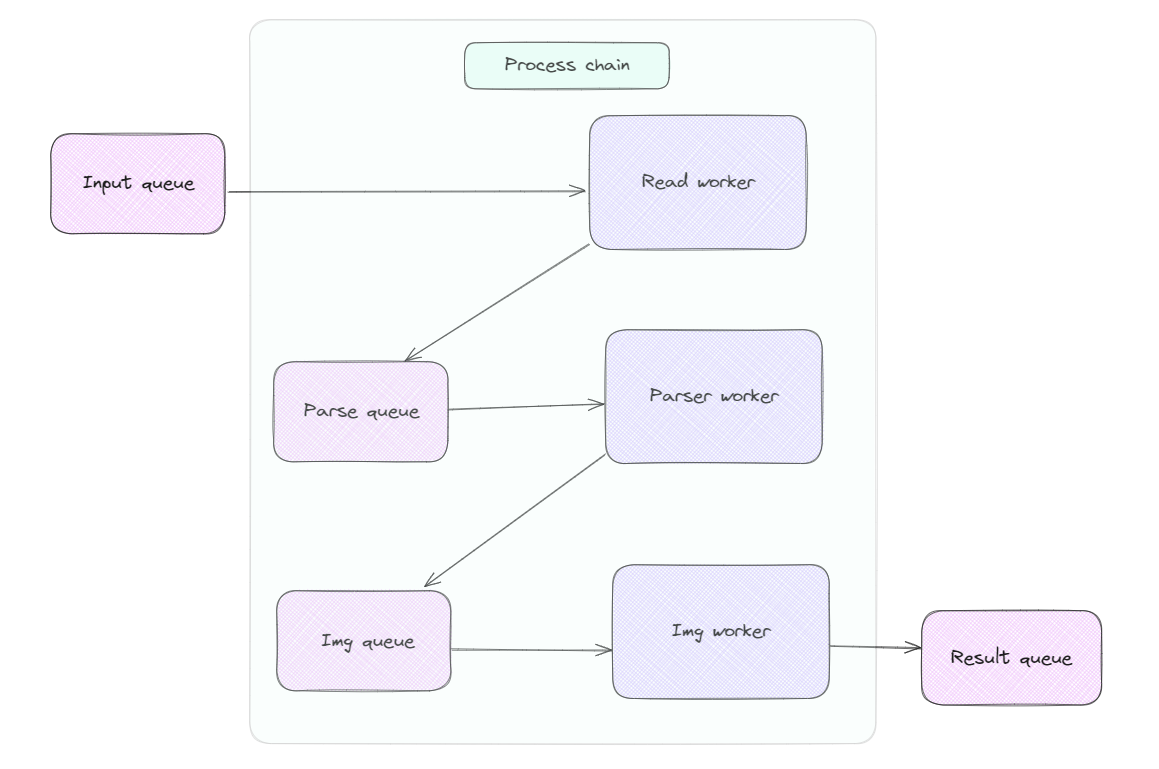

Соберем данные с https://www.varnike.ru/page01.html

In [1]:
import requests
import io
doc = requests.get(
    'https://www.varnike.ru/page01.html',
    headers={
        "User-Agent":'My User Agent 1.0',
    }
)

In [2]:
text = doc.content.decode('utf-8')
text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\n<html>\r\n <head>\r\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n  <meta name="keywords" content="логические задачи, психологический практикум, инспектор Варнике, преступники, преступления, сайты с задачами">\r\n  <meta name="description" content="Логические задачи с участием инспектора Варнике">\r\n  <link rel="stylesheet" type="text/css" href="style01.css" />\r\n  <title>Логические задачи с участием инспектора Варнике</title>\r\n </head>\r\n <body>\r\n<input type="button" value="Вернуться на главную" class="button" onclick="javascript:window.location=\'index.html\'"/>\r\n<img src="./Detektiv/Varnike.jpg" width="130px" height="180px" alt="logo" align="left" >\r\n <pre>    Автор рисунков к рассказам про инспектора Варнике из немецкого журнала «Ойленшпигель» – художник Гарри Паршау. \r\n    Он создал незабываемый образ инспектора,который носит только кл

Давай достанем все ссылки

In [3]:
from bs4 import BeautifulSoup
from pathlib import Path
import io
soup = BeautifulSoup(io.StringIO(text), 'html.parser')

In [4]:
references = [item['href'] for item in soup.find_all('a')]
references

['./Detektiv/1-VARNIKE/page0101.html',
 './Detektiv/1-VARNIKE/page0111.html',
 './Detektiv/1-VARNIKE/page0121.html',
 './Detektiv/1-VARNIKE/page0131.html',
 './Detektiv/1-VARNIKE/page0141.html',
 './Detektiv/1-VARNIKE/page0151.html',
 './Detektiv/1-VARNIKE/page0102.html',
 './Detektiv/1-VARNIKE/page0112.html',
 './Detektiv/1-VARNIKE/page0122.html',
 './Detektiv/1-VARNIKE/page0132.html',
 './Detektiv/1-VARNIKE/page0142.html',
 './Detektiv/1-VARNIKE/page0152.html',
 './Detektiv/1-VARNIKE/page0103.html',
 './Detektiv/1-VARNIKE/page0113.html',
 './Detektiv/1-VARNIKE/page0123.html',
 './Detektiv/1-VARNIKE/page0133.html',
 './Detektiv/1-VARNIKE/page0143.html',
 './Detektiv/1-VARNIKE/page0153.html',
 './Detektiv/1-VARNIKE/page0104.html',
 './Detektiv/1-VARNIKE/page0114.html',
 './Detektiv/1-VARNIKE/page0124.html',
 './Detektiv/1-VARNIKE/page0134.html',
 './Detektiv/1-VARNIKE/page0144.html',
 './Detektiv/1-VARNIKE/page0154.html',
 './Detektiv/1-VARNIKE/page0105.html',
 './Detektiv/1-VARNIKE/pa

In [5]:
BASE_URL = 'https://www.varnike.ru'

In [6]:
goal_list = [BASE_URL + ref[1:] for ref in references]

In [7]:
goal_list

['https://www.varnike.ru/Detektiv/1-VARNIKE/page0101.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0111.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0121.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0131.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0141.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0151.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0102.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0112.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0122.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0132.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0142.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0152.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0103.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0113.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0123.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0133.html',
 'https://www.varnike.ru/Detektiv/1-VARN

In [8]:
!pip install -q httpx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 638.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


Реализуем первую стадию, чтобы посмотреть как это работает

Мы будем работать с асинхроным клиентом `httpx` https://www.python-httpx.org/
и стандартной библиотекой `asyncio`

В качестве очереди мы будем использовать `asyncio.Queue`. На самом деле это обычная `collection.deque` с реализованными операциями асинхронного чтения и запис

In [9]:
import asyncio
import httpx


async def task_worker(id : int, in_queue: asyncio.Queue, out_queue: asyncio.Queue):
    # create context for each task
    async with httpx.AsyncClient() as client:
        while True:
            try:
                url = await in_queue.get()
                print(f"[Task Worker {id=}] Processing '{url=}'")
                data = await client.get(url)
                print(f'Status {data}')
                await out_queue.put(data)
                # inform queue that we are done with data we took
                in_queue.task_done()
            except:
                in_queue.task_done()
                continue

async def main():
    """
    Starter code
    """

    # создаем входную и выходную очередь
    in_queue = asyncio.Queue()
    out_queue = asyncio.Queue()

    # создаем work-еров
    # прицепляем нашу задачу к event_loop
    pool = [asyncio.create_task(task_worker(worker_id, in_queue, out_queue)) for worker_id in range(3)]

    # populate queue with numbers as user's name
    for item in goal_list:
        in_queue.put_nowait(item)

    # ждем когда все очереди исполнятся
    await in_queue.join()

    # cancel tasks
    for task in pool:
        task.cancel()

    # check data
    print(f"[Main task] Processed {out_queue.qsize()} data!")
    return out_queue



Jupyter ноутбук позволяет нативно работать с асинхронными операциями. Просто напиште `await` :)

In [10]:
results = await main()

[Task Worker id=0] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0101.html''
[Task Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0111.html''
[Task Worker id=2] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0121.html''
Status <Response [200 OK]>
[Task Worker id=0] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0131.html''
Status <Response [200 OK]>
[Task Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0141.html''
Status <Response [200 OK]>
[Task Worker id=0] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0151.html''
Status <Response [200 OK]>
[Task Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0102.html''
Status <Response [200 OK]>
[Task Worker id=0] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0112.html''
Status <Response [200 OK]>
[Task Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0122

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-2' coro=<task_worker() done, defined at <ipython-input-9-4a4fb72d04f2>:5> exception=ValueError('task_done() called too many times')>
Traceback (most recent call last):
  File "<ipython-input-9-4a4fb72d04f2>", line 10, in task_worker
    url = await in_queue.get()
  File "/usr/lib/python3.10/asyncio/queues.py", line 159, in get
    await getter
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-9-4a4fb72d04f2>", line 18, in task_worker
    in_queue.task_done()
  File "/usr/lib/python3.10/asyncio/queues.py", line 202, in task_done
    raise ValueError('task_done() called too many times')
ValueError: task_done() called too many times
ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-3' coro=<task_worker() done, defined at <ipython-input-9-4a4fb72d04f2>:5> exception=

Status <Response [200 OK]>
[Task Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0150.html''
Status <Response [200 OK]>
Status <Response [200 OK]>
Status <Response [200 OK]>
[Main task] Processed 54 data!


In [11]:
item = results._queue.pop()

In [12]:
text = item.content.decode('utf-8')
text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\n<html>\r\n <head>\r\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n  <meta name="keywords" content="логические задачи, психологический практикум, Семейные расчеты, инспектор Варнике, преступники, преступления, сайты с задачами, детектив, детективный">\r\n  <meta name="description" content="Инспектор Варнике Задача Семейные расчеты">\r\n  <link rel="stylesheet" type="text/css" href="../../style0101.css"/>\r\n  <title>Инспектор Варнике "Семейные расчеты"</title>\r\n </head>\r\n <body>\r\n<input type="button" value="ВАРНИКЕ - все задачи" class="button" onclick="javascript:window.location=\'../../page01.html\'"/>\r\n <pre> <img src="p0150.jpg" width="430px" height="230px" alt="logo">\r\n <b>  СЕМЕЙНЫЕ РАСЧЕТЫ</b> \r\n- Этого я не переживу! Вчера мы, то есть сестра моей покойной жены и я, потеряли отца и тестя, \r\n  а сегодня, видимо, самое ценное из его иму

In [13]:
from bs4 import BeautifulSoup
import io
soup = BeautifulSoup(io.StringIO(text), 'html.parser')

Первая часть
Тэг `<pre>` - предформатированный текст

In [14]:
pre_elems = soup.find("pre")

In [15]:
[item for item in pre_elems]

[' ',
 <img alt="logo" height="230px" src="p0150.jpg" width="430px"/>,
 '\r\n ',
 <b>  СЕМЕЙНЫЕ РАСЧЕТЫ</b>,
 ' \r\n- Этого я не переживу! Вчера мы, то есть сестра моей покойной жены и я, потеряли отца и тестя, \r\n  а сегодня, видимо, самое ценное из его имущества. Когда я вернулся домой после продолжительной прогулки, \r\n  в комнате покойного царил невероятный беспорядок. Все было перевернуто. \r\n  К сожалению, раньше я вообще не интересовался состоянием дел своего тестя, а завещания он не оставил.\r\n- А деньги у него были? - спросил инспектор Варнике.\r\n- Деньги он обычно хранил в ящике письменного стола. Книга с записями его денежных дел исчезла. \r\n  Правда, на ковре я нашел вот эту промокашку. Посмотрите, здесь отчетливо виден отпечаток последней записи, \r\n  сделанный покойным перед смертью. Сумма, указанная на промокательной бумаге, по-видимому, \r\n  должна соответствовать количеству денег в ящике письменного стола. И...\r\n  Выслушав это сообщение, инспектор Варнике отв

Проверить что элемент имеет тэг можно с помощью свойства name

In [16]:
[item.name for item in pre_elems]

[None, 'img', None, 'b', None, 'b', None]

In [17]:
soup.find('b').text

'  СЕМЕЙНЫЕ РАСЧЕТЫ'

Стратегия извлечения
- `img` - картинка
- `None` -  постановка
- Первый `b` - название
- Второй `b` - вопрос


In [18]:
setting = [item.text for item in pre_elems if item.name is None]
title, question = [item.text for item in pre_elems if item.name == 'b']
img = pre_elems.find('img')['src']
answer = soup.find("p", {"class": "otvet_zadachi_in"})['onmousedown'][16:-1]

In [19]:
result = {
    'setting': ' '.join(setting).strip(),
    'title': title.strip(),
    'question': question.strip(),
    'img': img,
    'answer': answer
}

In [20]:
result

{'setting': '- Этого я не переживу! Вчера мы, то есть сестра моей покойной жены и я, потеряли отца и тестя, \r\n  а сегодня, видимо, самое ценное из его имущества. Когда я вернулся домой после продолжительной прогулки, \r\n  в комнате покойного царил невероятный беспорядок. Все было перевернуто. \r\n  К сожалению, раньше я вообще не интересовался состоянием дел своего тестя, а завещания он не оставил.\r\n- А деньги у него были? - спросил инспектор Варнике.\r\n- Деньги он обычно хранил в ящике письменного стола. Книга с записями его денежных дел исчезла. \r\n  Правда, на ковре я нашел вот эту промокашку. Посмотрите, здесь отчетливо виден отпечаток последней записи, \r\n  сделанный покойным перед смертью. Сумма, указанная на промокательной бумаге, по-видимому, \r\n  должна соответствовать количеству денег в ящике письменного стола. И...\r\n  Выслушав это сообщение, инспектор Варнике отвел "пострадавшего" в ближайший полицейский участок.',
 'title': 'СЕМЕЙНЫЕ РАСЧЕТЫ',
 'question': 'Почем

Соберем все вместе в рабочую функцию

In [21]:
from bs4 import BeautifulSoup
import io

def parse_work(req):

    soup = BeautifulSoup(io.StringIO(req.content.decode('utf-8')), 'html.parser')
    # pre
    pre_elems = soup.find("pre")
    setting = [item.text for item in pre_elems if item.name is None]
    title, question = [item.text for item in pre_elems if item.name == 'b']
    img = pre_elems.find('img')['src']
    # answer
    answer = soup.find("p", {"class": "otvet_zadachi_in"})['onmousedown'][16:-1]

    return {
        'setting': ' '.join(setting).strip(),
        'title': title.strip(),
        'question': question.strip(),
        'img_url': BASE_URL + 'Detektiv/1-VARNIKE/' +img,
        'answer': answer
    }

In [22]:
parse_work(item)

{'setting': '- Этого я не переживу! Вчера мы, то есть сестра моей покойной жены и я, потеряли отца и тестя, \r\n  а сегодня, видимо, самое ценное из его имущества. Когда я вернулся домой после продолжительной прогулки, \r\n  в комнате покойного царил невероятный беспорядок. Все было перевернуто. \r\n  К сожалению, раньше я вообще не интересовался состоянием дел своего тестя, а завещания он не оставил.\r\n- А деньги у него были? - спросил инспектор Варнике.\r\n- Деньги он обычно хранил в ящике письменного стола. Книга с записями его денежных дел исчезла. \r\n  Правда, на ковре я нашел вот эту промокашку. Посмотрите, здесь отчетливо виден отпечаток последней записи, \r\n  сделанный покойным перед смертью. Сумма, указанная на промокательной бумаге, по-видимому, \r\n  должна соответствовать количеству денег в ящике письменного стола. И...\r\n  Выслушав это сообщение, инспектор Варнике отвел "пострадавшего" в ближайший полицейский участок.',
 'title': 'СЕМЕЙНЫЕ РАСЧЕТЫ',
 'question': 'Почем

In [23]:
async def parse_worker(id : int, in_queue: asyncio.Queue, out_queue: asyncio.Queue):
    while True:
        try:
            req = await in_queue.get()
            print(f"[Parse Worker {id=}] Processing '{req=}'")

            data = parse_work(req)
            print(f'Status {data=}')
            await out_queue.put(data)
            # inform queue that we are done with data we took
            in_queue.task_done()
        except Exception as e:
            print(e)
            in_queue.task_done()
            continue

Добавили parser worker

In [24]:
async def main_with_parser_worker():
    """
    Starter code
    """

    in_queue = asyncio.Queue()
    parse_queue =  asyncio.Queue()
    out_queue = asyncio.Queue()

    # создаем work-еров
    # прицепляем нашу задачу к event_loop
    reader_pool = [asyncio.create_task(task_worker(worker_id, in_queue, parse_queue)) for worker_id in range(3)]
    parse_pool = [asyncio.create_task(parse_worker(worker_id, parse_queue, out_queue)) for worker_id in range(3)]

    # populate queue with numbers as user's name
    for item in goal_list:
        in_queue.put_nowait(item)

    # ждем когда все очереди исполнятся
    await in_queue.join()
    await parse_queue.join()

    # cancel tasks
    for task in reader_pool:
        task.cancel()

    for task in parse_pool:
        task.cancel()

    # check data
    print(f"[Main task] Processed {out_queue.qsize()} data!")
    return out_queue

In [25]:
result = await main_with_parser_worker()

[Task Worker id=0] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0101.html''
[Task Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0111.html''
[Task Worker id=2] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0121.html''
Status <Response [200 OK]>
[Task Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0131.html''
[Parse Worker id=0] Processing 'req=<Response [200 OK]>'
Status data={'setting': 'Пасхальный праздник инспектор Варнике проводил в кругу семьи Плюм. И вдруг неприятность - исчезло яйцо. \r\nЯрко раскрашенное пасхальное яйцо из папье-маше, внутри которого был спрятан дорогой браслет - \r\nподарок для хозяйки дома. \r\nВ разгар поисков в гостиную вошел взволнованный мистер Джеймс, брат хозяйки, и рассказал следующее:\r\n- Я все это время был на веранде. Случайно оглянувшись, я увидел, как мой племянник Томми, \r\nкоторый находился один в комнате и стоял у стола, вдруг поглядел на лежащее на ш

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-12' coro=<task_worker() done, defined at <ipython-input-9-4a4fb72d04f2>:5> exception=ValueError('task_done() called too many times')>
Traceback (most recent call last):
  File "<ipython-input-9-4a4fb72d04f2>", line 10, in task_worker
    url = await in_queue.get()
  File "/usr/lib/python3.10/asyncio/queues.py", line 159, in get
    await getter
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-9-4a4fb72d04f2>", line 18, in task_worker
    in_queue.task_done()
  File "/usr/lib/python3.10/asyncio/queues.py", line 202, in task_done
    raise ValueError('task_done() called too many times')
ValueError: task_done() called too many times
ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-13' coro=<task_worker() done, defined at <ipython-input-9-4a4fb72d04f2>:5> exceptio

Status data={'setting': '- Этого я не переживу! Вчера мы, то есть сестра моей покойной жены и я, потеряли отца и тестя, \r\n  а сегодня, видимо, самое ценное из его имущества. Когда я вернулся домой после продолжительной прогулки, \r\n  в комнате покойного царил невероятный беспорядок. Все было перевернуто. \r\n  К сожалению, раньше я вообще не интересовался состоянием дел своего тестя, а завещания он не оставил.\r\n- А деньги у него были? - спросил инспектор Варнике.\r\n- Деньги он обычно хранил в ящике письменного стола. Книга с записями его денежных дел исчезла. \r\n  Правда, на ковре я нашел вот эту промокашку. Посмотрите, здесь отчетливо виден отпечаток последней записи, \r\n  сделанный покойным перед смертью. Сумма, указанная на промокательной бумаге, по-видимому, \r\n  должна соответствовать количеству денег в ящике письменного стола. И...\r\n  Выслушав это сообщение, инспектор Варнике отвел "пострадавшего" в ближайший полицейский участок.', 'title': 'СЕМЕЙНЫЕ РАСЧЕТЫ', 'questio

In [26]:
await result.get()

{'setting': 'Пасхальный праздник инспектор Варнике проводил в кругу семьи Плюм. И вдруг неприятность - исчезло яйцо. \r\nЯрко раскрашенное пасхальное яйцо из папье-маше, внутри которого был спрятан дорогой браслет - \r\nподарок для хозяйки дома. \r\nВ разгар поисков в гостиную вошел взволнованный мистер Джеймс, брат хозяйки, и рассказал следующее:\r\n- Я все это время был на веранде. Случайно оглянувшись, я увидел, как мой племянник Томми, \r\nкоторый находился один в комнате и стоял у стола, вдруг поглядел на лежащее на шкафу яйцо, \r\nвскарабкался на стул, схватил это яйцо и исчез в саду. Я бросился за ним, вот оболочка яйца, я нашел ее в кустах... \r\n"Томми, а куда ты дел браслет? - спросил я его. - Ну-ка, говори, маленький разбойник!"\r\nОскорбленный мальчик заявил, что ничего не знает. \r\nОн не возражал против того, что действительно находился один в комнате \r\nи рассматривал раскрашенные в разные цвета яйца, но яйца из папье-маше не видел. \r\nЧтобы воссоздать первоначальную к

Реализация worker-а для изображений

In [27]:
 BASE_URL

'https://www.varnike.ru'

In [28]:
!wget https://www.varnike.ru/Detektiv/1-VARNIKE/p0121.jpg

--2024-04-20 18:26:34--  https://www.varnike.ru/Detektiv/1-VARNIKE/p0121.jpg
Resolving www.varnike.ru (www.varnike.ru)... 141.8.194.53, 2a0a:2b43:29:d3e0::
Connecting to www.varnike.ru (www.varnike.ru)|141.8.194.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69243 (68K) [image/jpeg]
Saving to: ‘p0121.jpg’

p0121.jpg           100%[===================>]  67.62K   392KB/s    in 0.2s    

2024-04-20 18:26:35 (392 KB/s) - ‘p0121.jpg’ saved [69243/69243]



Для кодирования картинки в текст используют алгоритм `base64`. В python уже есть готовая реализация

In [29]:
import httpx
import base64

data =httpx.get('https://www.varnike.ru/Detektiv/1-VARNIKE/p0121.jpg')

result = base64.b64encode(data.content)

In [30]:
result

b'/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAIBAQIBAQICAgICAgICAwUDAwMDAwYEBAMFBwYHBwcGBwcICQsJCAgKCAcHCg0KCgsMDAwMBwkODw0MDgsMDAz/2wBDAQICAgMDAwYDAwYMCAcIDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCADgAcIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAK8I/wCCg3/BSD4U/wDBMr4Jt44+Kmty2NrcO0Gl6XZRC41TXLhV3GG2hLKGbGMu7JGm5d7rkZ93r5K/4K1/8Efvh3/wVn+DDaN4k8rQPHGlWj2vhrxcttJdzeHxLc2s8+LcTR

Итоговая схема
```json
{
    'setting': string,
    'title': string,
    'question': string,
    'img_url': BASE_URL + 'Detektiv/1-VARNIKE/' +img,
    'answer': string,
    'img_base64`: bytes
}
```

Проверка изображения

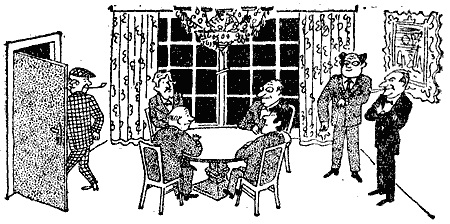

In [31]:
from PIL import Image
import io

Image.open(io.BytesIO(data.content))

Ваша реализация `Image Worker`

In [32]:
import base64

async def get_img_and_encode(client: httpx.AsyncClient,image_url:str):
    req = await client.get(image_url)
    if req.ok():
        return  base64.b64encode(req.content)
    else:
        raise Exception('bad img')

In [36]:
async def image_worker(id : int, in_queue: asyncio.Queue, out_queue: asyncio.Queue):
    async with httpx.AsyncClient() as client:
        while True:
            try:
                req = await in_queue.get()
                print(f"[Parse Worker {id=}] Processing '{req['img_url']}'")

                image = get_img_and_encode(req['img_url'])
                print(f'Status {image=}')
                req['image_base_64'] = image
                await out_queue.put(req)
                # inform queue that we are done with data we took
                in_queue.task_done()
            except Exception as e:
                print(e)
                in_queue.task_done()
                continue

Используем классы для обобщения процесса.



In [34]:
import typing as tp
from collections import OrderedDict
class Worker:
    def __init__(self, name: str, work : tp.Callable, num_worker: int ):
        self.queue = asyncio.Queue()
        self.name = name
        self.num_worker = num_worker
        self.tasks = []

    def _start(self, in_queue: asyncio.Queue):
        for worker_id in range(self.num_worker):
            print(f'{self.name}_{worker_id} start')
            self.tasks.append(asyncio.create_task(task_worker(worker_id, self.queue)))

    async def _join(self):
        await self.queue.join()

    async def _stop(self):
        for task in self.tasks:
            task.cancel()


class WorkerChain:
    def __init__(self, *worker: Worker):
        self.in_queue = asyncio.Queue()

        self.chain = worker
        self.out_queue = worker[-1].queue

    def populate(self,task_list):
        for item in goal_list:
            self.in_queue.put_nowait(item)

    def start(self,in_queue: asyncio.Queue):
        pass

    async def _join(self):
        for comp in self.chain:
            await comp.queue.join()
            print(f"[Main task] Processed {comp.queue.qsize()} data!")


async def final_pipeline():

    # структуру обработки удобно задать через
    pipeline = WorkerChain(
        Worker('reader',task_worker),
        Worker('parser',task_worker),
        Worker('image',task_worker)
    )

    pipeline.populate(goal_list)

    for worker in pipeline_componetnts[1:]

    out_queue = pipeline_componetnts[-1]
    # check data
    print(f"[Main task] Processed {out_queue.qsize()} data!")
    return out_queue

In [35]:
result = await main_with_parser_worker()

[Task Worker id=0] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0101.html''
[Task Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0111.html''
[Task Worker id=2] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0121.html''
Status <Response [200 OK]>
[Task Worker id=0] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0131.html''
[Parse Worker id=0] Processing 'req=<Response [200 OK]>'
Status data={'setting': 'На одной из вилл на краю города 3альцбург поселился некий Альфредо ди Мейро Благодаря приятной наружности и аристократичным манерам \r\n ему удалось добиться расположения самых влиятельных людей города. \r\n Пользуясь необычайной популярностью в городе,дон Альфредо занимал деньги направо и налево.\r\n Когда же сумма его долгов приняла внушительные размеры, виллу Альфредо ди Мейро посетил инспектор Варнике.\r\n Хозяин виллы принял инспектора необычайно любезно, провел его во внутренние помещения,где на стенах б

CancelledError: 

Status <Response [200 OK]>
[Task Worker id=0] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0137.html''
[Parse Worker id=1] Processing 'req=<Response [200 OK]>'
Status data={'setting': '— Господин инспектор, уверяю вас: недоразумение произошло лишь по моей рассеянности.\r\n— Прошу вас, не волнуйтесь. Мы сейчас выслушаем пострадавшего. Пожалуйста, говорите!\r\n— Я ехал с этим господином в одном купе. Еще при посадке я обратил внимание, что обе багажные сетки были заполнены различными свертками. \r\n  оставалось лишь место над этим господином, куда я и положил свой чемодан.В пути мы разговорились.\r\n  Я рассказал, что еду к сыну, которому везу в подарок альбомы с очень ценной коллекцией марок,которую я собирал много лет. \r\n  Затем я заснул и проснулся, когда поезд уже прибыл на место. \r\n  Одевшись, я собрался выходить, как вдруг заметил, что мой чемодан лежит не там, где я его положил. \r\n  Я открыл его и увидел, что он наполнен ватными игрушками. \r\n  Как я рад, 